# Stackoverflow survey 2018 


## Overview

<p>As a newcomer to the Data Science field I'm interested in learning about potential obstacles. For that I will be using data collected from Stack Overflow annual developer survey.</p>

<ol>
    <li> How many people come to the field being 45 and older?</li>
    <li> What is the most popular job titles within newcomers?</li>
    <li> Who has bigger starting salary newcomers under 25 or over 45?</li></ol>



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [4]:

df_18 = pd.read_csv('./survey_results_public_18.csv', low_memory=False)
df_18.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [5]:
# Following code idea was borrowed from here: https://www.kaggle.com/gpreda/stack-overflow-2018-developer-survey-extensive-eda
df_jobs = pd.DataFrame.from_records(df_18['DevType'].dropna().apply(lambda x: x.split(';')).values.tolist()).stack().reset_index(drop=True).value_counts()

In [6]:
df_jobs.index

Index(['Back-end developer', 'Full-stack developer', 'Front-end developer',
       'Mobile developer', 'Desktop or enterprise applications developer',
       'Student', 'Database administrator', 'Designer', 'System administrator',
       'DevOps specialist', 'Data or business analyst',
       'Data scientist or machine learning specialist', 'QA or test developer',
       'Engineering manager', 'Embedded applications or devices developer',
       'Game or graphics developer', 'Product manager',
       'Educator or academic researcher', 'C-suite executive (CEO, CTO, etc.)',
       'Marketing or sales professional'],
      dtype='object')

In [7]:
df_18.shape[0]

98855

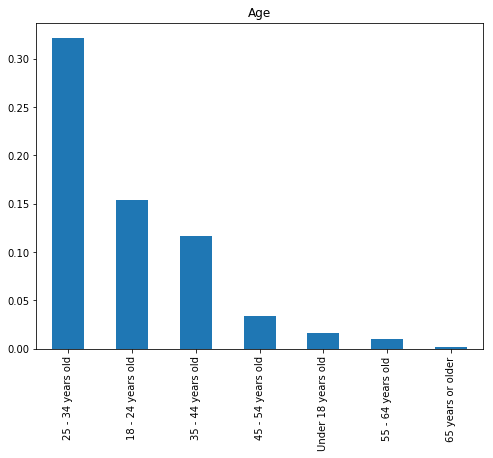

In [9]:
age_vals = df_18.Age.value_counts()

(age_vals[:]/df_18.shape[0]).plot(kind="bar", figsize=(8,6));
plt.title("Age");

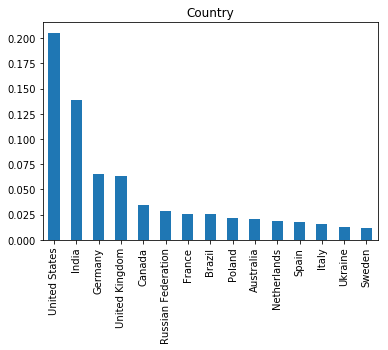

In [11]:
count_vals = df_18.Country.value_counts()
(count_vals[:15]/df_18.shape[0]).plot(kind="bar");
plt.title("Country");

In [12]:
df_18.Gender.dropna().head(10)

0       Male
1       Male
3       Male
4       Male
5       Male
6       Male
7     Female
8       Male
14      Male
17      Male
Name: Gender, dtype: object

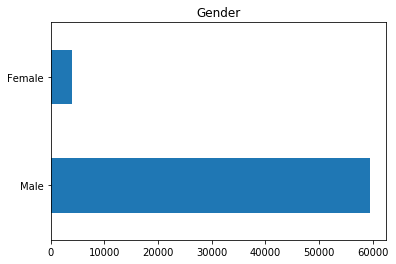

In [13]:
df_18.Gender.dropna().value_counts()[:2].plot(kind='barh', title = 'Gender');

In [14]:
df_18.ConvertedSalary.unique()

array([    nan,  70841.,  21426., ...,  11244., 269076.,   1584.])

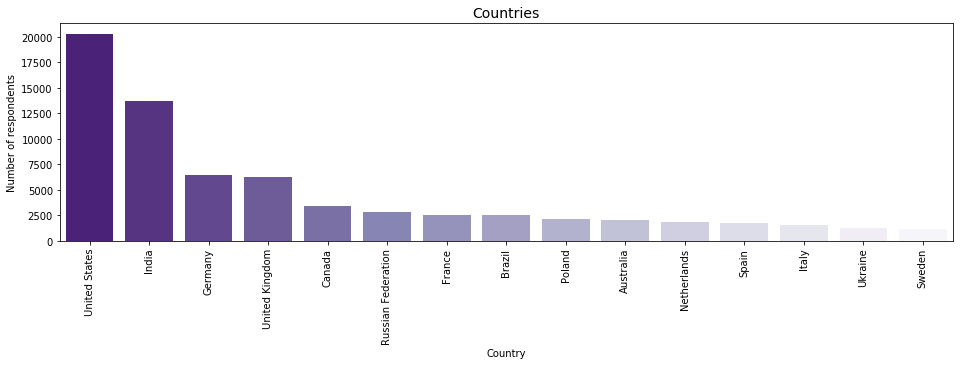

In [15]:
# Following code idea was borrowed from here: https://www.kaggle.com/gpreda/stack-overflow-2018-developer-survey-extensive-eda

def plot_stats(feature, text, n, size=2):
    temp = df_18[feature].dropna().value_counts().head(n)
    df1 = pd.DataFrame({feature: temp.index,'Number of respondents': temp.values})
    plt.figure(figsize = (8*size,4))
    plt.title(text,fontsize=14)
    s = sns.barplot(x=feature,y='Number of respondents',data=df1, palette="Purples_r")
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()   
    
plot_stats('Country','Countries', 15)

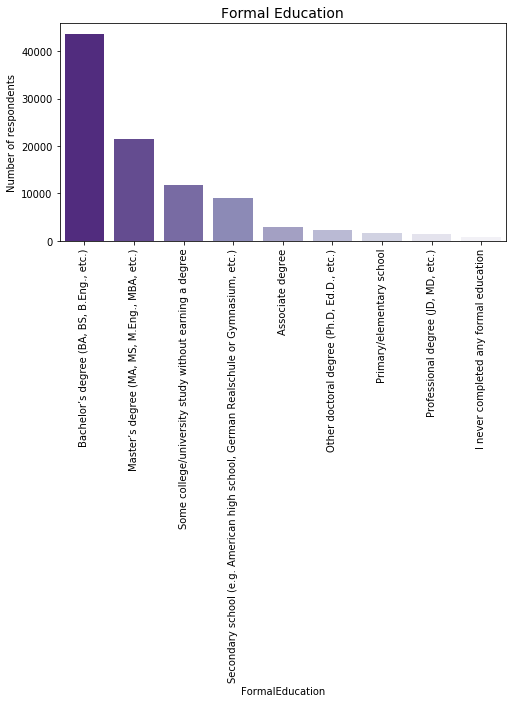

In [16]:
plot_stats('FormalEducation','Formal Education',10,1)

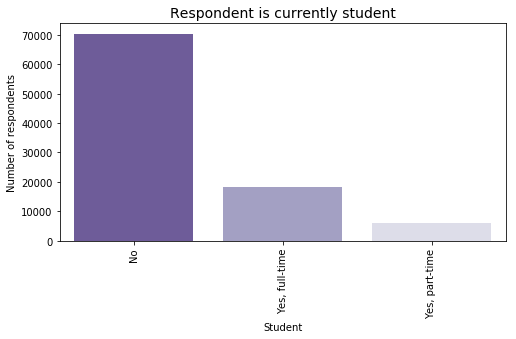

In [17]:
plot_stats('Student','Respondent is currently student',5,1)

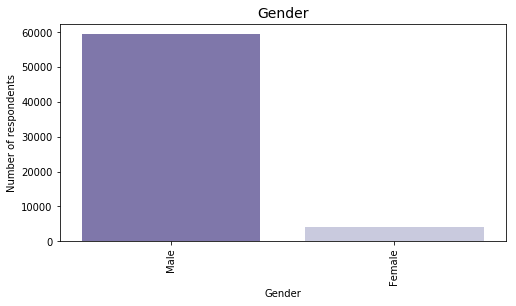

In [18]:
plot_stats('Gender', 'Gender',2,1)

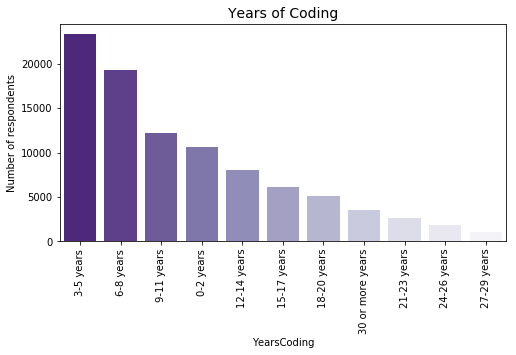

In [19]:
plot_stats('YearsCoding', 'Years of Coding', 15,1)

In [20]:
# New data set with columns that I potentially will need
df_less = df_18[['Gender', 'Country', 'Employment', 'Student', 'Age', 'FormalEducation', 
                'ConvertedSalary', 'DevType', 'YearsCoding', 'JobSatisfaction']]
df_less.head()

,Gender,Country,Employment,Student,Age,FormalEducation,ConvertedSalary,DevType,YearsCoding,JobSatisfaction
0,Male,Kenya,Employed part-time,No,25 - 34 years old,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,Full-stack developer,3-5 years,Extremely satisfied
1,Male,United Kingdom,Employed full-time,No,35 - 44 years old,"Bachelor’s degree (BA, BS, B.Eng., etc.)",70841.0,Database administrator;DevOps specialist;Full-...,30 or more years,Moderately dissatisfied
2,NaN,United States,Employed full-time,No,NaN,Associate degree,NaN,Engineering manager;Full-stack developer,24-26 years,Moderately satisfied
3,Male,United States,Employed full-time,No,35 - 44 years old,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,Full-stack developer,18-20 years,Neither satisfied nor dissatisfied
4,Male,South Africa,Employed full-time,"Yes, part-time",18 - 24 years old,Some college/university study without earning ...,21426.0,Data or business analyst;Desktop or enterprise...,6-8 years,Slightly satisfied


In [21]:
# print newcomers percentage within the age group for 25-34 and 35-44 

print(df_less[(df_less['YearsCoding'] == '0-2 years') & (df_less['Age'] == '25 - 34 years old')].shape[0]/df_less.shape[0])
print(df_less[(df_less['YearsCoding'] == '0-2 years') & (df_less['Age'] == '35 - 44 years old')].shape[0]/df_less.shape[0])

0.019816903545597085
0.002407566638005159


In [24]:
# Two new sets for newcomers in the age groups of 18-24 and 45-54 
newcomers_45 = df_less[(df_less['YearsCoding'] == '0-2 years') & (df_less['Age'] == '45 - 54 years old')]
newcomers_24 = df_less[(df_less['YearsCoding'] == '0-2 years') & (df_less['Age'] == '18 - 24 years old')]
newcomers_45.shape[0]

48

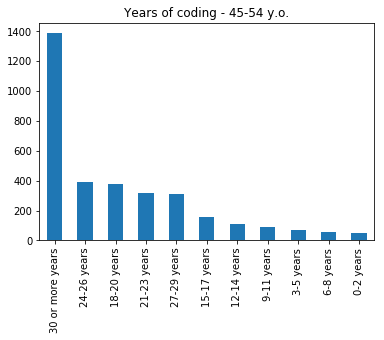

In [25]:
df_less[df_less['Age'] == '45 - 54 years old']['YearsCoding'].value_counts().plot(kind='bar', title="Years of coding - 45-54 y.o.");

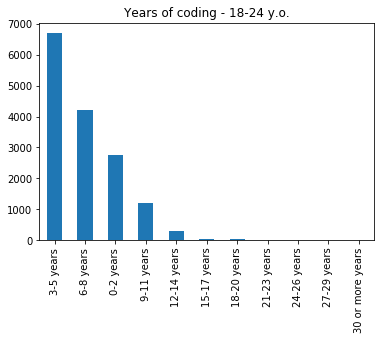

In [26]:
df_less[df_less['Age'] == '18 - 24 years old']['YearsCoding'].value_counts().plot(kind='bar', title="Years of coding - 18-24 y.o.");

In [27]:

print('Mean salary for newcomers 45 - 54 year old:',round(newcomers_45[newcomers_45['ConvertedSalary'] < 500000]['ConvertedSalary'].mean()))
print('Mean salary for newcomers 18 - 24 year old:',round(newcomers_24[newcomers_24['ConvertedSalary'] < 500000]['ConvertedSalary'].mean()))

Mean salary for newcomers 45 - 54 year old: 80357.0
Mean salary for newcomers 18 - 24 year old: 22237.0


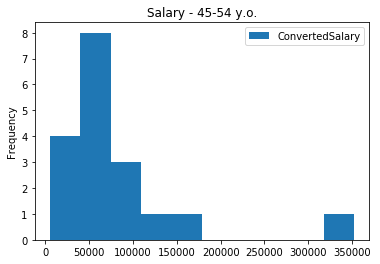

In [28]:
newcomers_45[newcomers_45['ConvertedSalary'] < 400000].plot(kind='hist', title='Salary - 45-54 y.o.');

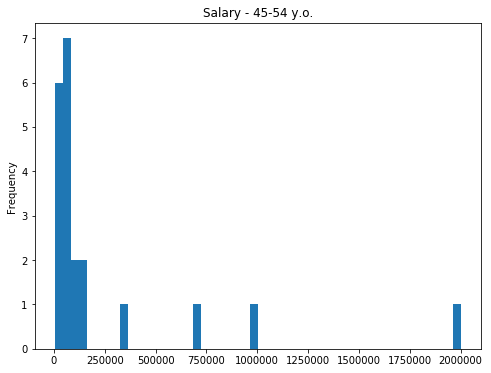

In [29]:
newcomers_45['ConvertedSalary'].plot(kind='hist', bins=50, title='Salary - 45-54 y.o.', figsize=(8,6));

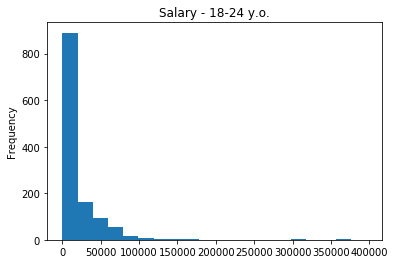

In [30]:
newcomers_24[newcomers_24['ConvertedSalary'] < 400000]['ConvertedSalary'].plot(kind='hist', bins=20, title='Salary - 18-24 y.o.');

In [31]:
jobs_45 = pd.DataFrame.from_records(newcomers_45['DevType'].dropna().apply(lambda x: x.split(';')).values.tolist()).stack().reset_index(drop=True).value_counts()
jobs_24 = pd.DataFrame.from_records(newcomers_24['DevType'].dropna().apply(lambda x: x.split(';')).values.tolist()).stack().reset_index(drop=True).value_counts()

In [33]:
jobs_45_pct = jobs_45/sum(jobs_45.values)*100
jobs_24_pct = jobs_24/sum(jobs_24.values)*100
jobs_pct = pd.concat([jobs_45_pct, jobs_24_pct], axis=1, sort=True)
jobs_pct.columns = ['Age 45-54', 'Age 18-24']
jobs_pct['Developer_type'] = jobs_pct.index
jobs_pct.reset_index(drop=True)
jobs_pct



,Age 45-54,Age 18-24,Developer_type
Back-end developer,13.483146,17.483133,Back-end developer
"C-suite executive (CEO, CTO, etc.)",2.247191,0.542681,"C-suite executive (CEO, CTO, etc.)"
Data or business analyst,5.617978,2.508067,Data or business analyst
Data scientist or machine learning specialist,3.370787,2.346729,Data scientist or machine learning specialist
Database administrator,2.247191,3.622763,Database administrator
Designer,7.865169,5.778821,Designer
Desktop or enterprise applications developer,3.370787,3.549428,Desktop or enterprise applications developer
DevOps specialist,2.247191,1.144031,DevOps specialist
Educator or academic researcher,4.494382,0.894691,Educator or academic researcher
Embedded applications or devices developer,2.247191,1.070695,Embedded applications or devices developer


In [35]:
print("Age 18-24 \n\n",jobs_24_pct.head(5))
print("Age 45-54 \n\n",jobs_45_pct.head(5))

Age 18-24 

 Student                 19.624523
Back-end developer      17.483133
Front-end developer     14.403051
Full-stack developer    11.924318
Mobile developer         7.949545
dtype: float64
Age 45-54 

 Student                 17.977528
Back-end developer      13.483146
Front-end developer     12.359551
Full-stack developer     7.865169
Designer                 7.865169
dtype: float64


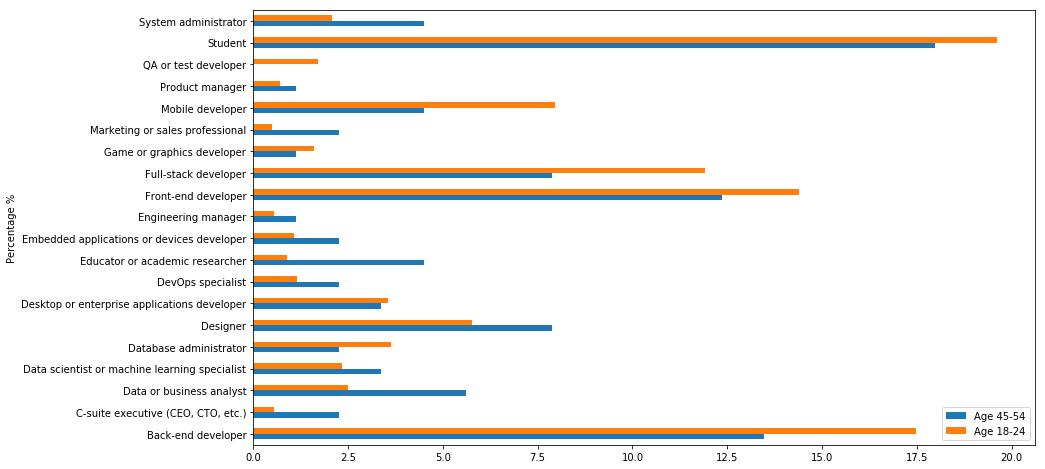

In [36]:
jobs_pct.plot(x='Developer_type', y = ['Age 45-54', 'Age 18-24'], kind='barh', figsize=(14,8))
plt.xlabel('')
plt.ylabel('Percentage %')
plt.show()

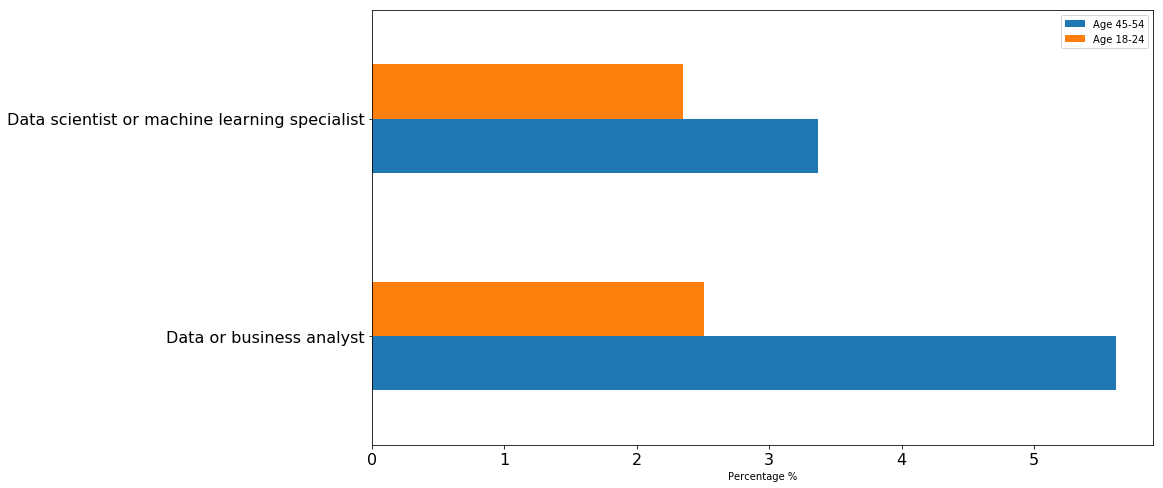

In [39]:
jobs_pct[jobs_pct['Developer_type'].str.contains('Data ')].plot(x='Developer_type', y = ['Age 45-54', 'Age 18-24'], 
                                                                kind='barh', figsize=(14,8), fontsize=16)
plt.xlabel('Percentage %')
plt.ylabel('')
plt.show()